In [1]:
import numpy as numpy

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from tqdm import tqdm
from konlpy.tag import Kkma
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [5]:
cpuData_csv = pd.read_csv('./cpuDataSet.csv',  encoding = 'CP949')

In [6]:
cpuData_csv['제목'] = cpuData_csv['발명의 명칭']
cpuData_csv['제목']

0        Iot를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템(real-...
1        7세주기 기반의 피부관리 카운셀링 시스템(skincare counselling sy...
2        의료 중재 레벨을 원격으로 판단하기 위한 방법 및 시스템(methods and sy...
3        사용자의 행동 분류 방법 및 장치(method and apparatus for cl...
4        신축성 저항 소자를 이용한 자세 모니터링 장치, 이를 이용한 자세 모니터링 방법 및...
                               ...                        
11822             Methods and devices for relieving stress
11823    Digital remote radio electrocardiographic moni...
11824    Managing system and managing method of organis...
11825               Life evidence sensing-reporting module
11826    Diagnostic radio frequency identification sens...
Name: 제목, Length: 11827, dtype: object

In [7]:
for i in range(len(cpuData_csv['발명의 명칭'])):
    cpuData_csv['발명의 명칭'][i] = re.sub(r'\([^)]*\)', '', cpuData_csv['발명의 명칭'][i])
# cpuData_csv['발명의 명칭']

0                 Iot를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템
1                                   7세주기 기반의 피부관리 카운셀링 시스템
2                          의료 중재 레벨을 원격으로 판단하기 위한 방법 및 시스템
3                                       사용자의 행동 분류 방법 및 장치
4        신축성 저항 소자를 이용한 자세 모니터링 장치, 이를 이용한 자세 모니터링 방법 및...
                               ...                        
11822             Methods and devices for relieving stress
11823    Digital remote radio electrocardiographic moni...
11824    Managing system and managing method of organis...
11825               Life evidence sensing-reporting module
11826    Diagnostic radio frequency identification sens...
Name: 발명의 명칭, Length: 11827, dtype: object

In [8]:
for i in range(len(cpuData_csv['대표청구항'])):
    cpuData_csv['대표청구항'][i] = cpuData_csv['대표청구항'][i][9:]
# cpuData_csv['대표청구항']

0        IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템에 있어서,...
1        데이터베이스, 피부관리 서버, 정보 입력 단말 및 사용자 단말을 포함하는 피부관리 ...
2        의료 통신 시스템으로서,\r\n착용 가능한 센서;\r\n상기 센서의 착용자의 활동에...
3        사용자의 행동을 복수의 행동종류 중 하나로 분류하는 방법에 있어서,\r\n상기 사용...
4        척추에 의해 분할되는 배부 (背部) 의 제1 부분 및 제2 부분이 신축되는 정도를 ...
                               ...                        
11822    1. A recognition patient in vivo at least one ...
11823    1. Digital remote wireless ECG monitoring syst...
11824    1, a kind of organism information management s...
11825    1. A sign of life sensing-reporting module, co...
11826    1. A diagnostic system, comprising: \r\nOne ha...
Name: 대표청구항, Length: 11827, dtype: object

In [9]:
cpuData_csv['꼬꼬마'] = cpuData_csv['발명의 명칭'][:6887] + ' ' + cpuData_csv['요약'][:6887] + cpuData_csv['대표청구항'][:6887]

In [10]:
kkmaCPU = Kkma()

In [11]:
def morph(input_data):
    preprcessed = kkmaCPU.pos(input_data)
    # print(preprcessed)
    return preprcessed

'Iot를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템 본 발명은 IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템에 관한 것이다. 보다 구체적으로, 지능형 인지 프레임워크를 사용하여 환자 상태 모니터링 및 헬스 케어가 가능하도록 스마트 센서 연결 계층 구조와 서비스 연결되어 웹 서비스에서 상기 스마트 센서에 대한 실시간 반응하는 IoT 브로커를 통해 정형화된 센싱 데이터, 멀티 프로토콜 자동 선택이 가능하도록 응급 수송차량에 의료장비 통신모듈이 구비된 IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템에 관한 것이다. 본 발명에 따른 IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템은, 센서 연결 계층 구조와 서비스 연결되어 웹 서비스에서 센서에 대한 실시간 반응하는 IoT 브로커를 통해 정형화된 센싱 데이터, 멀티 프로토콜 자동 선택이 가능하도록 응급 수송차량에 의료장비 통신 모듈을 통해 지능형 인지 프레임워크를 사용하여 환자 상태 모니터링 및 헬스케어가 가능한 효과를 제공할 수 있다. 또한, 본 발명에 따른 IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템은, 응급 수송차량에 의료장비에 설치할 수 있는 통신 모듈을 통해 실시간 응급환자의 상태 체크, 응급처치가 가능하고 응급 차량 내에서 환자의 바이탈 신호를 의료진에게 신속히 전송할 수 있고, 상황 인지 프레임워크와 개방형 서비스 플랫폼을 사용하여 환자의 상황을 의료진의 판단과 함께 시스템에서 위험도를 예측하여 사전 예방 조치를 취할 수 있는 효과를 제공할 수 있다.IoT를 기반 스마트 센서를 포함하는 환자 상태 실시간 정보 전송 시스템에 있어서,\\r\\n상기 시스템은 웹 서비스에서 센서에 대한 정확성을 제공하고 정형화된 센싱 데이터 및 명령어 제공, 멀티 프로토콜 자동 선택과 처리가 가능하여 센서 및 제어기 연동이 가능하여 보안 및 안정성 강화를 제공되는 IoT 브로커; 및\\r\\n센서노드와

In [13]:
# str(cpuData_csv['꼬꼬마'].values)[2:-3]
morpheme = morph(str(cpuData_csv['꼬꼬마'].values)[2:-3])
# print(morpheme)

'), ('통하', 'VV'), ('어', 'ECS'), ('정', 'NNG'), ('형화', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), ('세', 'VV'), ('ㄴ', 'ETD'), ('싱', 'UN'), ('데이터', 'NNG'), (',', 'SP'), ('멀티', 'NNG'), ('프로', 'NNG'), ('토', 'NNG'), ('콜', 'NNG'), ('자동', 'NNG'), ('선택', 'NNG'), ('이', 'JKS'), ('가능', 'NNG'), ('하', 'XSV'), ('도록', 'ECD'), ('응급', 'NNG'), ('수송', 'NNG'), ('차량', 'NNG'), ('에', 'JKM'), ('의료', 'NNG'), ('장비', 'NNG'), ('통신', 'NNG'), ('모듈', 'NNG'), ('을', 'JKO'), ('통하', 'VV'), ('어', 'ECS'), ('지능', 'NNG'), ('형', 'XSN'), ('인지', 'NNG'), ('프레임', 'NNG'), ('워크', 'NNG'), ('를', 'JKO'), ('사용', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('환자', 'NNG'), ('상태', 'NNG'), ('모니터링', 'NNG'), ('및', 'MAG'), ('헬스', 'NNG'), ('케어', 'NNG'), ('가', 'JKS'), ('가능', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('효과', 'NNG'), ('를', 'JKO'), ('제공', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('다', 'EFN'), ('.', 'SF'), ('또', 'MAG'), ('한', 'NNG'), (',', 'SP'), ('본', 'NNG'), ('발명', 'NNG'), ('에', 'JKM'), ('따르', 'VV'), ('ㄴ', 'ETD'), ('IoT', 'OL'), ('

In [14]:
def get_wordData(morpheme_pos):
    # words = [s for s, t in morpheme]
    # tags = [t for s, t in morpheme]
    wordData = []
    for words, tags in morpheme_pos:
        if (tags == 'NNG') or (tags == 'NNP') or (tags == 'OL'):
            wordData.append(words)
    
    return wordData

In [15]:
wordMaterialList = get_wordData(morpheme)
wordMaterialStr = '시작'
for word in wordMaterialList:
    wordMaterialStr = wordMaterialStr + ' ' + word

wordMaterialStr = wordMaterialStr[3:]
wordMaterialStr

'Iot 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 본 발명 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 구체적 지능 인지 프레임 워크 사용 환자 상태 모니터링 헬스 케어 가능 스마트 센서 연결 계층 구조 서비스 연결 웹 서비스 상기 스마트 센서 실시간 반응 IoT 브로커 정 형화 데이터 멀티 프로 토 콜 자동 선택 가능 응급 수송 차량 의료 장비 통신 모듈 구비 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 발명 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 센서 연결 계층 구조 서비스 연결 웹 서비스 센서 실시간 반응 IoT 브로커 정 형화 데이터 멀티 프로 토 콜 자동 선택 가능 응급 수송 차량 의료 장비 통신 모듈 지능 인지 프레임 워크 사용 환자 상태 모니터링 헬스 케어 가능 효과 제공 한 본 발명 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 응급 수송 차량 의료 장비 설치 통신 모듈 실시간 응급 환자 상태 체크 응급 처치 가능 응급 차량 내 환자 바이탈 신호 의료진 전송 상황 인지 프레임 워크 개방형 서비스 플랫폼 사용 환자 상황 의료진 판단 시스템 위험도 예측 사전 예방 조치 효과 제공 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 r n 상기 시스템 웹 서비스 센서 정확성 제공 정형 데이터 명령어 제공 멀티 프로 토 콜 자동 선택과 처리 가능 센서 제어기 연동 가능 보안 안정성 강화 제공 IoT 브로커 r n 센서 노드 무선 연동 센서 노드 전송 정형 데이터 명령어 IoT 응용 서비스 멀티 프로 토 콜 자동 선택 처리 보안 프라이버시 강화 환자 상태 시 지능 인지 프레임 워크 사용 환자 상태 모니터링 헬스 케어 가능 센서 연결 계층 구조 서비스 연결 웹 서비스 센서 실시간 반응 IoT 브로커 정 형화 데이터 멀티 프로 토 콜 자동 선택 가능 제어부 포함 특징 IoT 기반 스마트 센서 포함 환자 상태 실시간 정보 전송 시스템 주기 

In [33]:
stopwords = set(STOPWORDS)
wordcloudObject = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                background_color='white',
                stopwords=stopwords).generate(wordMaterialStr)
                # 맑음 폰트, 배경 하얀색, 불용어 => stopwords
# wordCloudData = WordCloud(font_path='font/NanumGothic.ttf', background_color='white').generate(wordMaterialStr)
# wordcloudData = wordcloudObject()


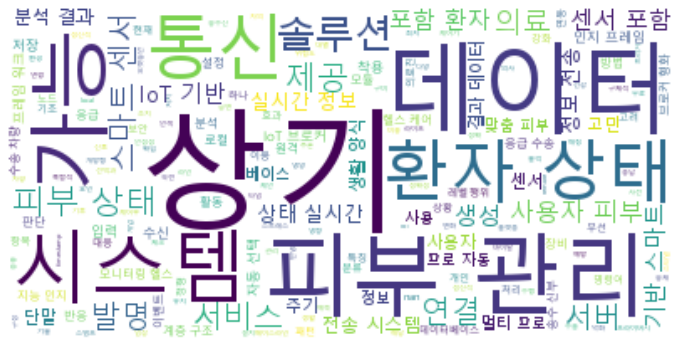

In [34]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloudObject, interpolation='bilinear')
plt.axis('off')
plt.show()
# plt.savefig() # 저장
